In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('/content/food_delivery.csv')

In [ ]:
df.head()

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,basket_amount_lc,delivery_fee_amount_lc,Payment Method,actual_delivery_time,promised_delivery_time,order_delay,dropoff_distance_manhattan,platform,vertical_class,vertical,is_affordable_freedelivery,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City
0,544145594,9/1/21 10:41,6zWSp9yqnEQuq4N6ykRgbbdQ,False,True,NaN,NaN,NaN,TGO,"134,69","119,7","14,99",Cash,1896.0,1739.0,157.0,3294.0,iOS,food,food,False,False,False,False,False,False,NaN,Chennai
1,544478492,9/1/21 18:17,TtmFFw26sQR26nBE2RykhxQA,False,True,NaN,NaN,NaN,TGO,"134,6454","129,6554","4,99",Cash,3506.0,2159.0,1347.0,1911.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
2,544358032,9/1/21 15:56,7pB4MC2aBPRdajLH2wPvIvAA,False,True,NaN,NaN,NaN,TGO,"84,49","79,5","4,99",Cash,3357.0,2159.0,1198.0,560.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
3,544366924,9/1/21 16:09,AFedsf0e-lSZer_X0eR4VE-g,False,True,NaN,NaN,NaN,TGO,"320,013","310,023","9,99",Cash,3237.0,2519.0,718.0,1380.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
4,544372362,9/1/21 16:16,JDYqF36aULSEaWsz604DuuRw,False,True,NaN,NaN,NaN,TGO,"83,99",69,"14,99",Online - Card,1216.0,1499.0,-283.0,1902.0,android,food,food,False,False,False,False,False,False,NaN,Chennai


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119885 entries, 0 to 119884
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    119885 non-null  int64  
 1   order_time                  119885 non-null  object 
 2   analytical_customer_id      119885 non-null  object 
 3   is_acquisition              119885 non-null  bool   
 4   is_successful               119885 non-null  bool   
 5   reason                      19716 non-null   object 
 6   sub_reason                  8348 non-null    object 
 7   owner                       19716 non-null   object 
 8   delivery_arrangement        119885 non-null  object 
 9   gmv_amount_lc               119885 non-null  object 
 10  basket_amount_lc            119885 non-null  object 
 11  delivery_fee_amount_lc      119885 non-null  object 
 12  Payment Method              119885 non-null  object 
 13  actual_deliver

<ipython-input-6-709df6ddd2bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


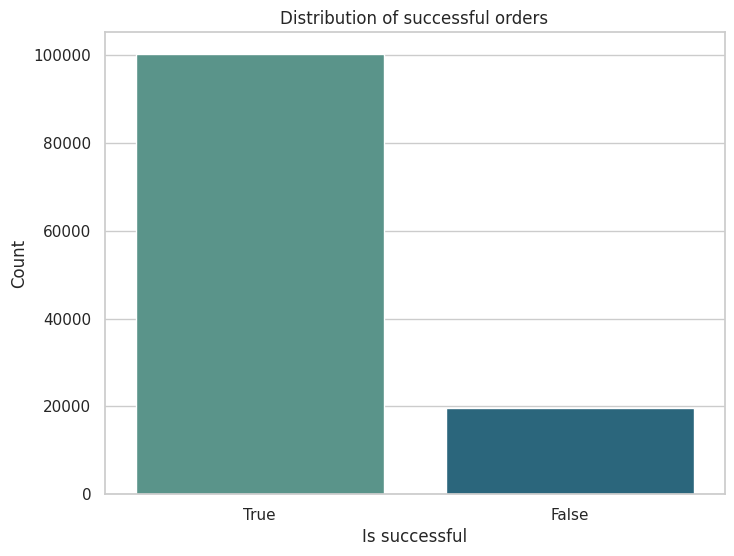

In [ ]:
counts = df['is_successful'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Is successful')
plt.ylabel('Count')
plt.title('Distribution of successful orders')
plt.show()

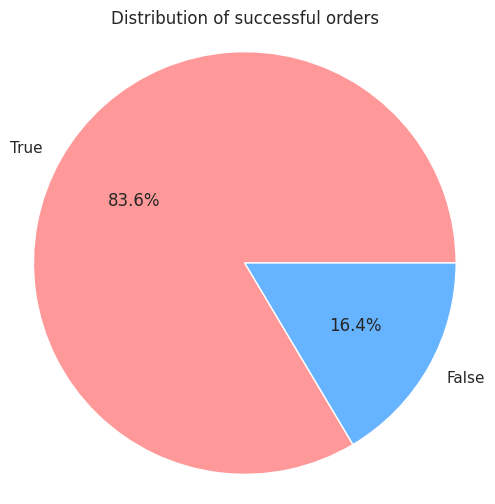

In [ ]:
custom_colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(counts.values, labels=counts.index.astype(str), autopct='%1.1f%%', colors=custom_colors)
plt.axis('equal')
plt.title('Distribution of successful orders')
plt.show()

<ipython-input-8-78a9059d4d9b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


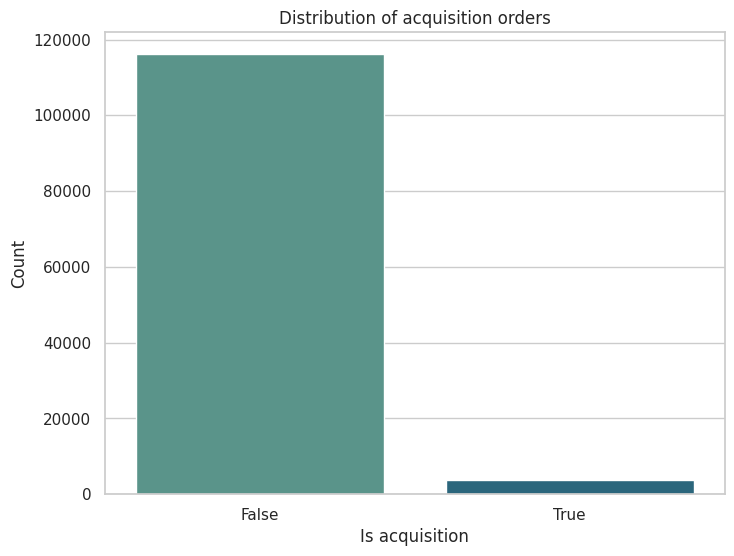

In [ ]:
counts = df['is_acquisition'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Is acquisition')
plt.ylabel('Count')
plt.title('Distribution of acquisition orders')
plt.show()

<ipython-input-9-0534b23e154f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


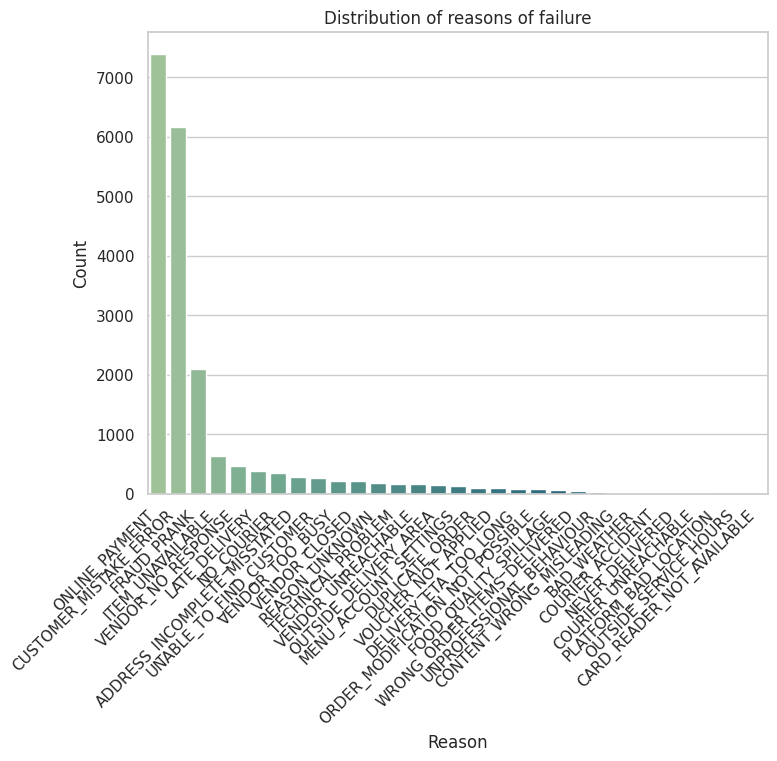

In [ ]:
counts = df['reason'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of reasons of failure')
plt.show()

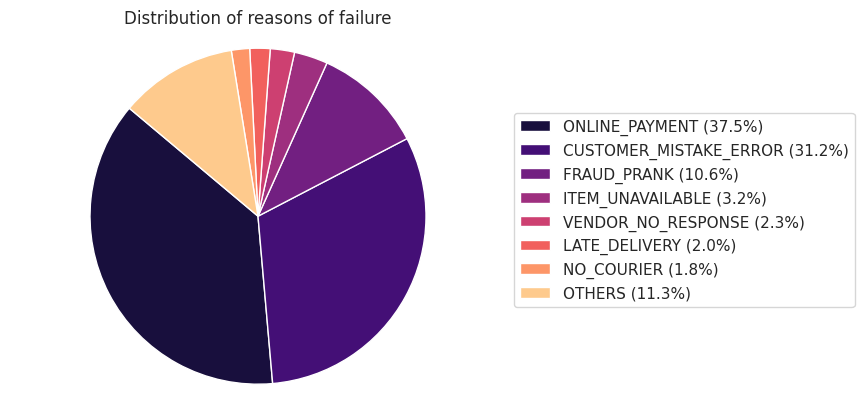

In [ ]:
counts = df['reason'].value_counts()
filtered_counts = counts[counts / counts.sum() >= 0.015]
other_count = counts[counts / counts.sum() < 0.015].sum()
filtered_counts['OTHERS'] = other_count
custom_palette = sns.color_palette("magma", len(filtered_counts))

labels = ['{0} ({1:1.1f}%)'.format(i, j) for i, j in zip(filtered_counts.index, filtered_counts.values/filtered_counts.values.sum()*100)]

plt.pie(filtered_counts.values, labels=None, colors=custom_palette, startangle=140)
plt.axis('equal')

plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.8))
plt.title('Distribution of reasons of failure', loc='center')
plt.show()

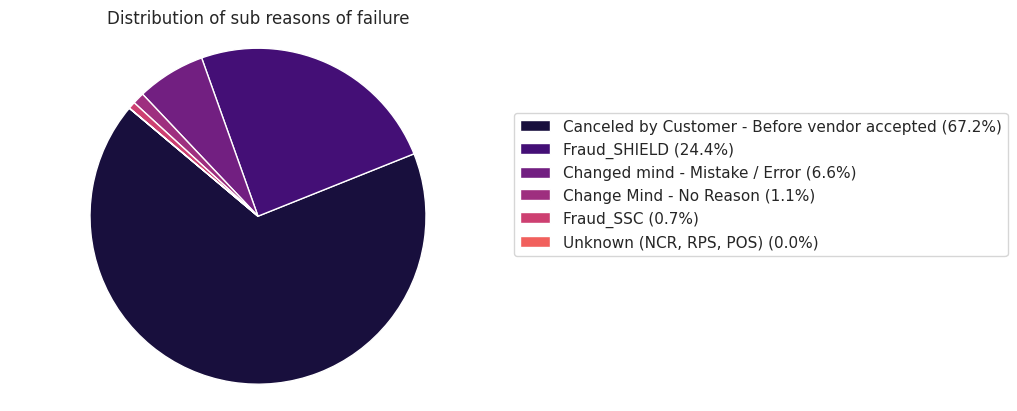

In [ ]:
counts = df['sub_reason'].value_counts()
# filtered_counts = counts[counts / counts.sum() >= 0.015]
# other_count = counts[counts / counts.sum() < 0.015].sum()
# filtered_counts['OTHERS'] = other_count
custom_palette = sns.color_palette("magma", len(filtered_counts))

labels = ['{0} ({1:1.1f}%)'.format(i, j) for i, j in zip(counts.index, counts.values/counts.values.sum()*100)]

plt.pie(counts.values, labels=None, colors=custom_palette, startangle=140)
plt.axis('equal')

plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.8))
plt.title('Distribution of sub reasons of failure', loc='center')
plt.show()

<ipython-input-12-d1489263f32c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


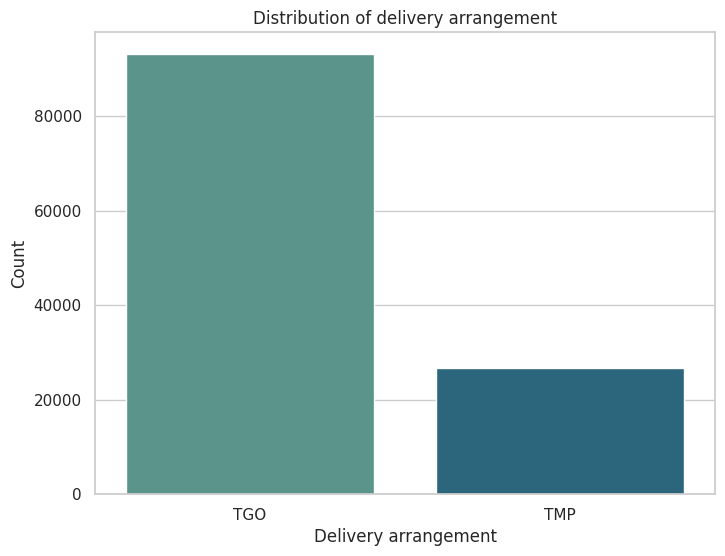

In [ ]:
counts = df['delivery_arrangement'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Delivery arrangement')
plt.ylabel('Count')
plt.title('Distribution of delivery arrangement')
plt.show()

<ipython-input-13-5a0de3f98b2f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


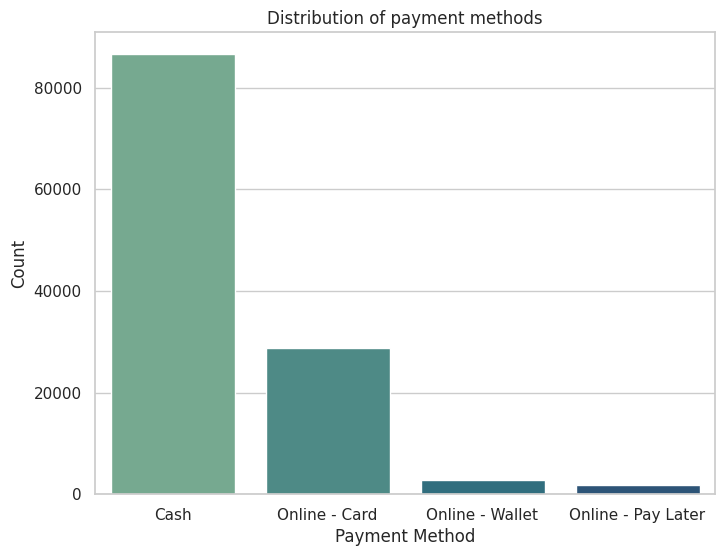

In [ ]:
counts = df['Payment Method'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of payment methods')
plt.show()

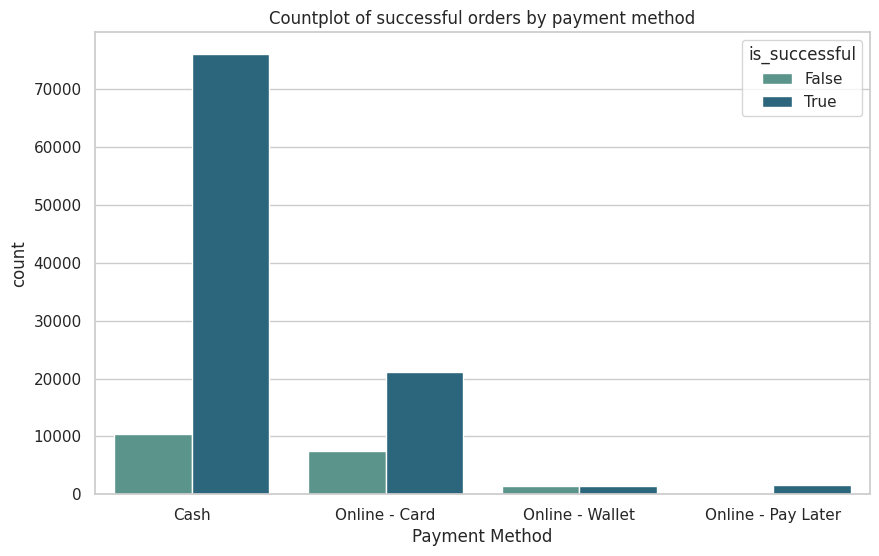

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Payment Method", hue="is_successful", data=df, palette = 'crest')
plt.title('Countplot of successful orders by payment method')
plt.show()

<ipython-input-15-f8b6103f8e5d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


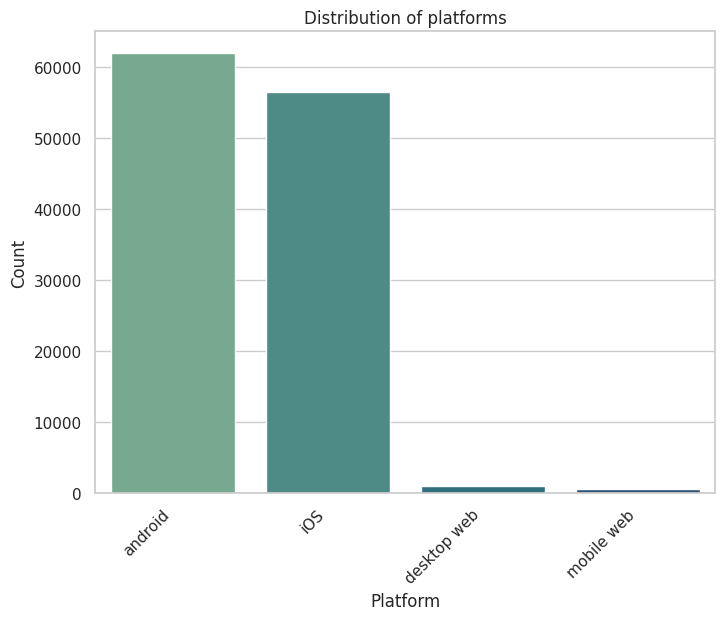

In [ ]:
counts = df['platform'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of platforms')
plt.show()

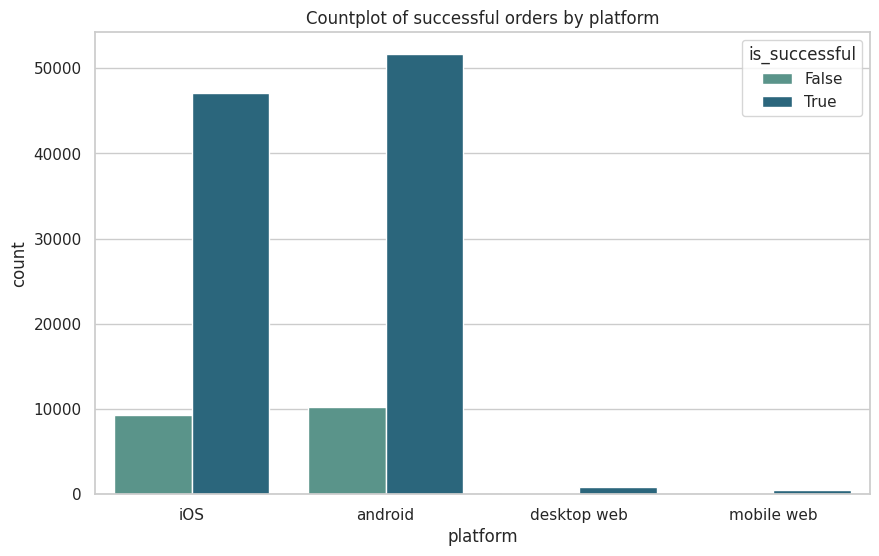

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="platform", hue="is_successful", data=df, palette = 'crest')
plt.title('Countplot of successful orders by platform')
plt.show()

<ipython-input-17-ea830571a6bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


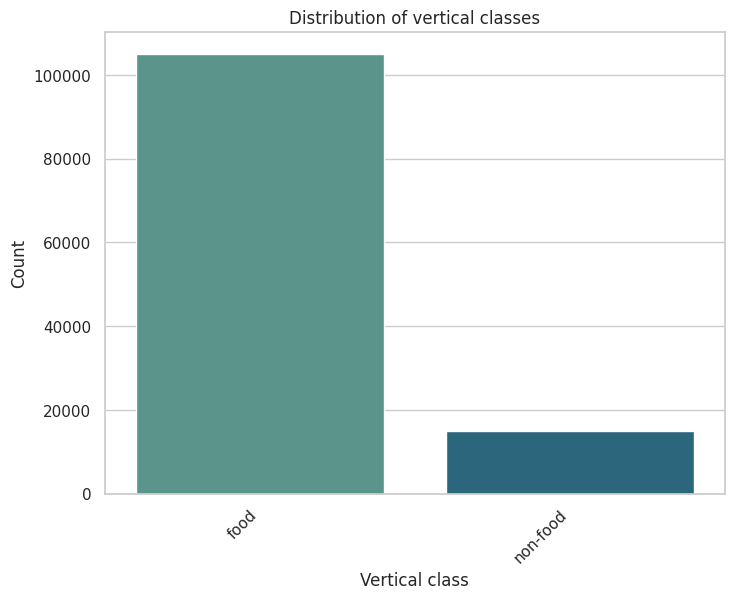

In [ ]:
counts = df['vertical_class'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Vertical class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of vertical classes')
plt.show()

<ipython-input-18-7ca80c3aa381>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


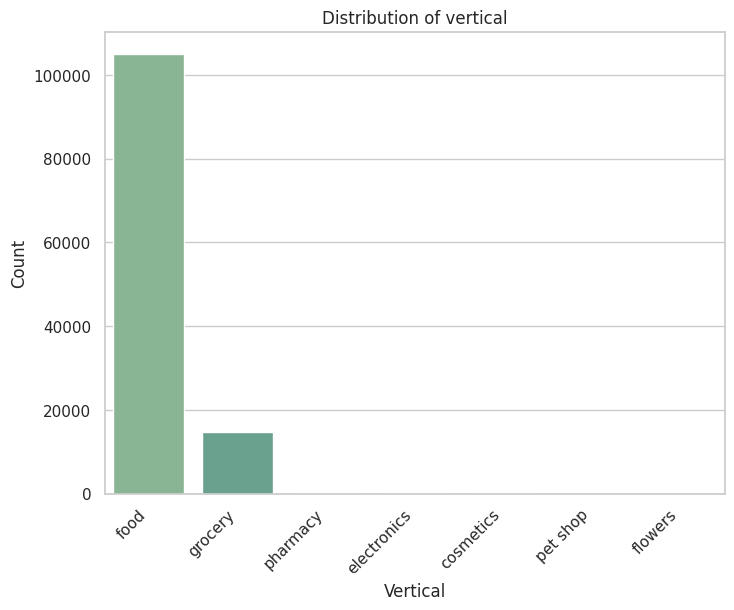

In [ ]:
counts = df['vertical'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Vertical')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of vertical')
plt.show()

<ipython-input-19-45e8d1add5f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


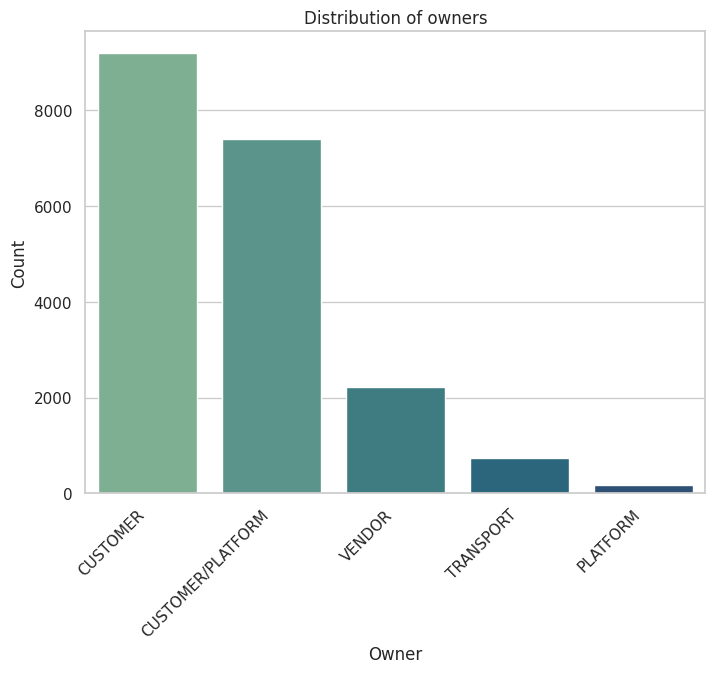

In [ ]:
counts = df['owner'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.title('Distribution of owners')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-20-092c374f96c2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time'])


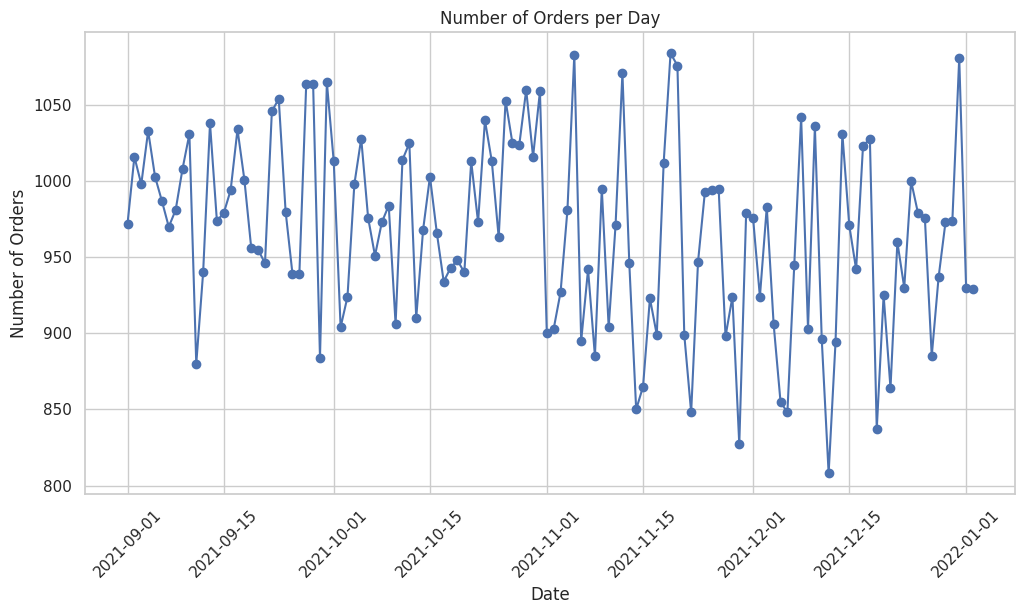

In [ ]:
df['order_time'] = pd.to_datetime(df['order_time'])
df['order_day'] = df['order_time'].dt.date
num_orders_per_day = df.groupby('order_day')['order_id'].count()
plt.figure(figsize=(12, 6))
plt.plot(num_orders_per_day.index, num_orders_per_day.values, marker='o', color='b', label='Number of Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

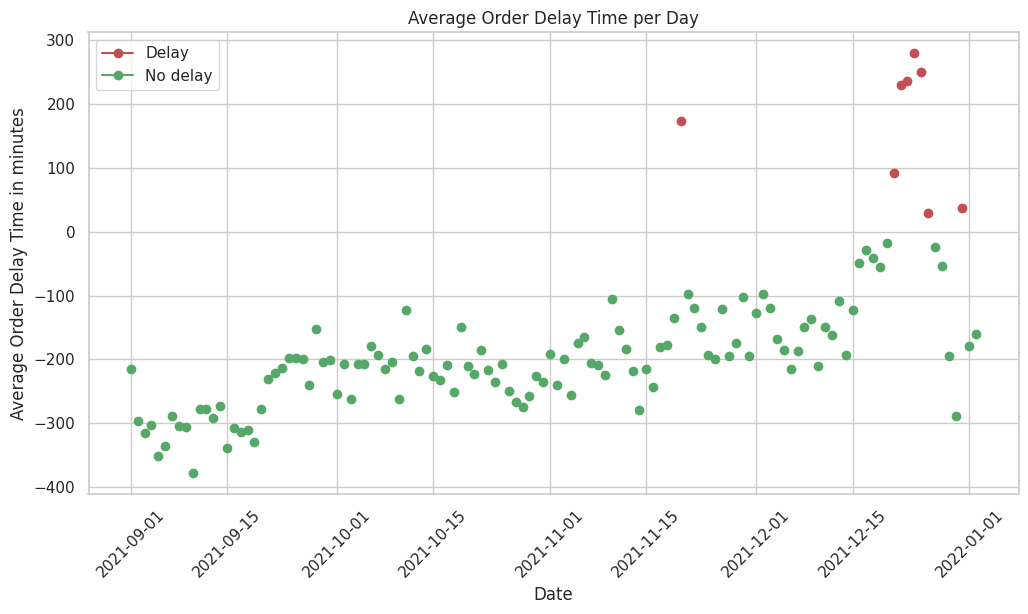

In [ ]:
plt.figure(figsize=(12, 6))
avg_delay_per_day = df.groupby('order_day')['order_delay'].mean()
for day, value in avg_delay_per_day.items():
    color = 'r' if value > 0 else 'g'
    plt.plot(day, value, marker='o', color=color)
plt.xlabel('Date')
plt.ylabel('Average Order Delay Time in minutes')
plt.title('Average Order Delay Time per Day')
plt.xticks(rotation=45)
plt.plot([], marker='o', color='r', label='Delay')
plt.plot([], marker='o', color='g', label='No delay')
plt.legend()
plt.grid(True)
plt.show()

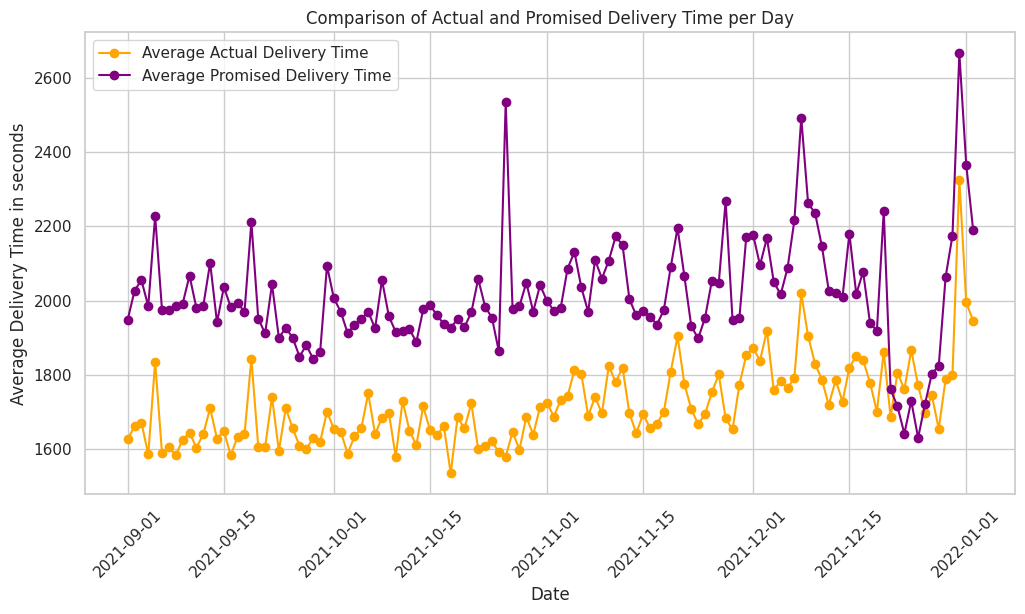

In [ ]:
avg_actual_delivery_time_per_day = df.groupby('order_day')['actual_delivery_time'].mean()

# Calculate the average promised delivery time per day
avg_promised_delivery_time_per_day = df.groupby('order_day')['promised_delivery_time'].mean()

# Create a line graph comparing the two features per day
plt.figure(figsize=(12, 6))
plt.plot(avg_actual_delivery_time_per_day.index, avg_actual_delivery_time_per_day.values, marker='o', color='orange', label='Average Actual Delivery Time')
plt.plot(avg_promised_delivery_time_per_day.index, avg_promised_delivery_time_per_day.values, marker='o', color='purple', label='Average Promised Delivery Time')
plt.xlabel('Date')
plt.ylabel('Average Delivery Time in seconds')
plt.title('Comparison of Actual and Promised Delivery Time per Day')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-23-c4bf52b4f1ed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


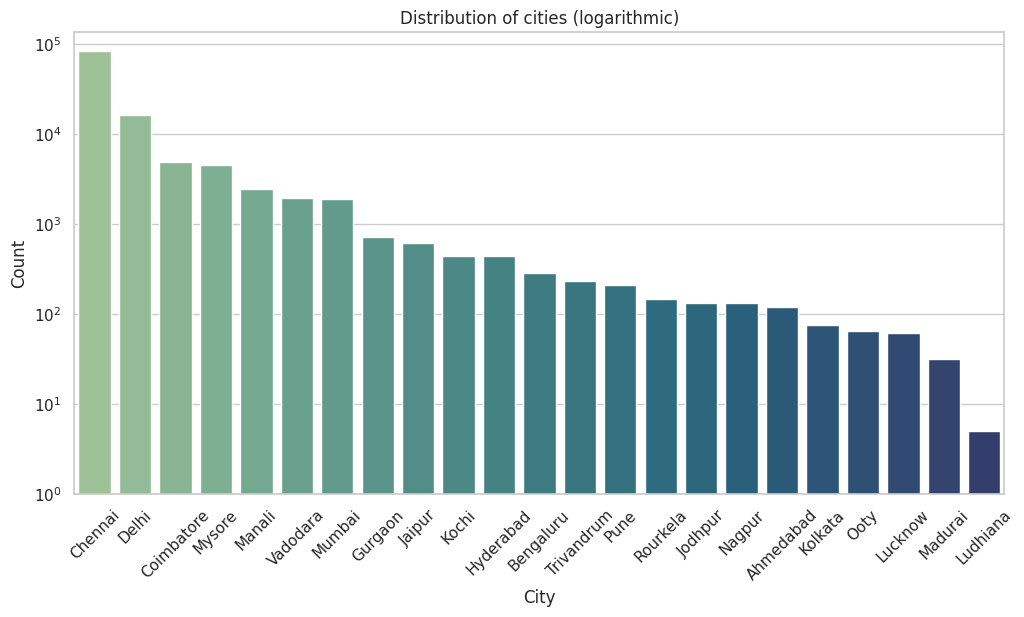

In [ ]:
counts = df['City'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of cities (logarithmic)')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.ylim(1, None)  # Set the minimum y-axis limit to 1
plt.xticks(rotation=45)
plt.show()

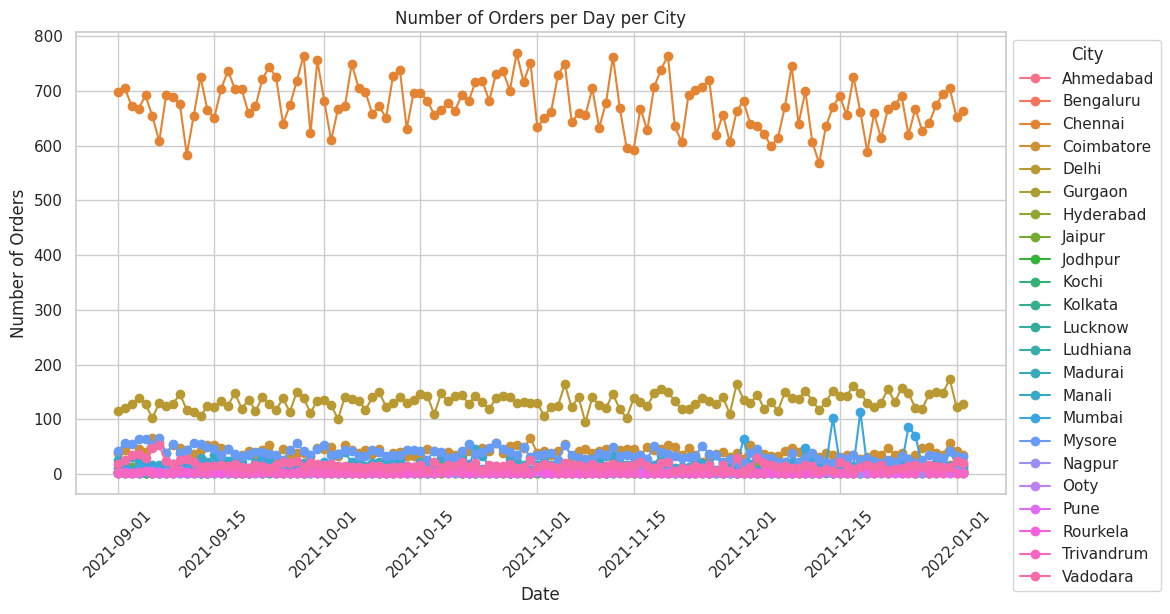

In [ ]:
orders_per_day_per_city = df.groupby(['order_day', 'City']).size().unstack()

plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', n_colors=len(orders_per_day_per_city.columns))

for i, city in enumerate(orders_per_day_per_city.columns):
    plt.plot(orders_per_day_per_city.index, orders_per_day_per_city[city], marker='o', label=city, color=colors[i])

plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day per City')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

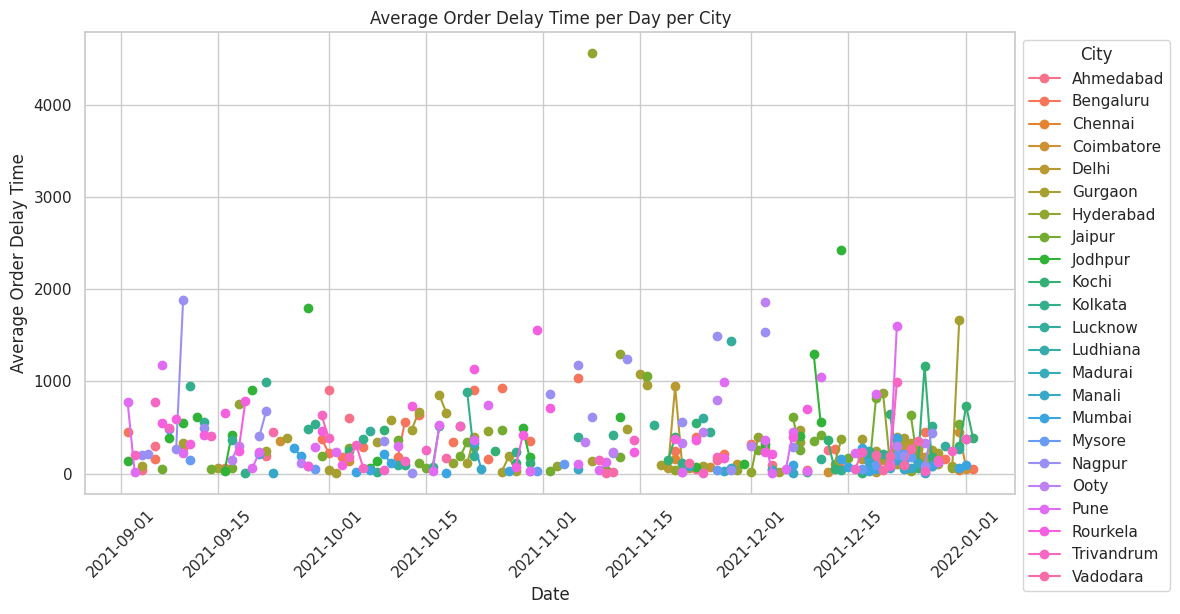

In [ ]:
avg_delay_per_day_per_city = df.groupby(['order_day', 'City'])['order_delay'].mean().unstack()
avg_delay_per_day_per_city_filtered = avg_delay_per_day_per_city[avg_delay_per_day_per_city > 0]
plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', n_colors=len(avg_delay_per_day_per_city.columns))
for i, city in enumerate(avg_delay_per_day_per_city_filtered.columns):
    plt.plot(avg_delay_per_day_per_city_filtered.index, avg_delay_per_day_per_city_filtered[city], marker='o', label=city, color=colors[i])

plt.xlabel('Date')
plt.ylabel('Average Order Delay Time')
plt.title('Average Order Delay Time per Day per City')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

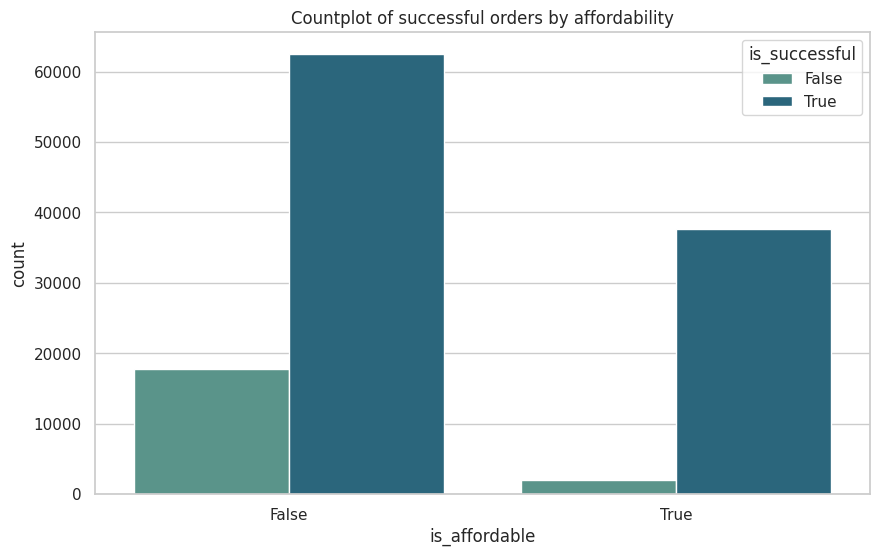

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="is_affordable", hue="is_successful", data=df, palette = 'crest')
plt.title('Countplot of successful orders by affordability')
plt.show()

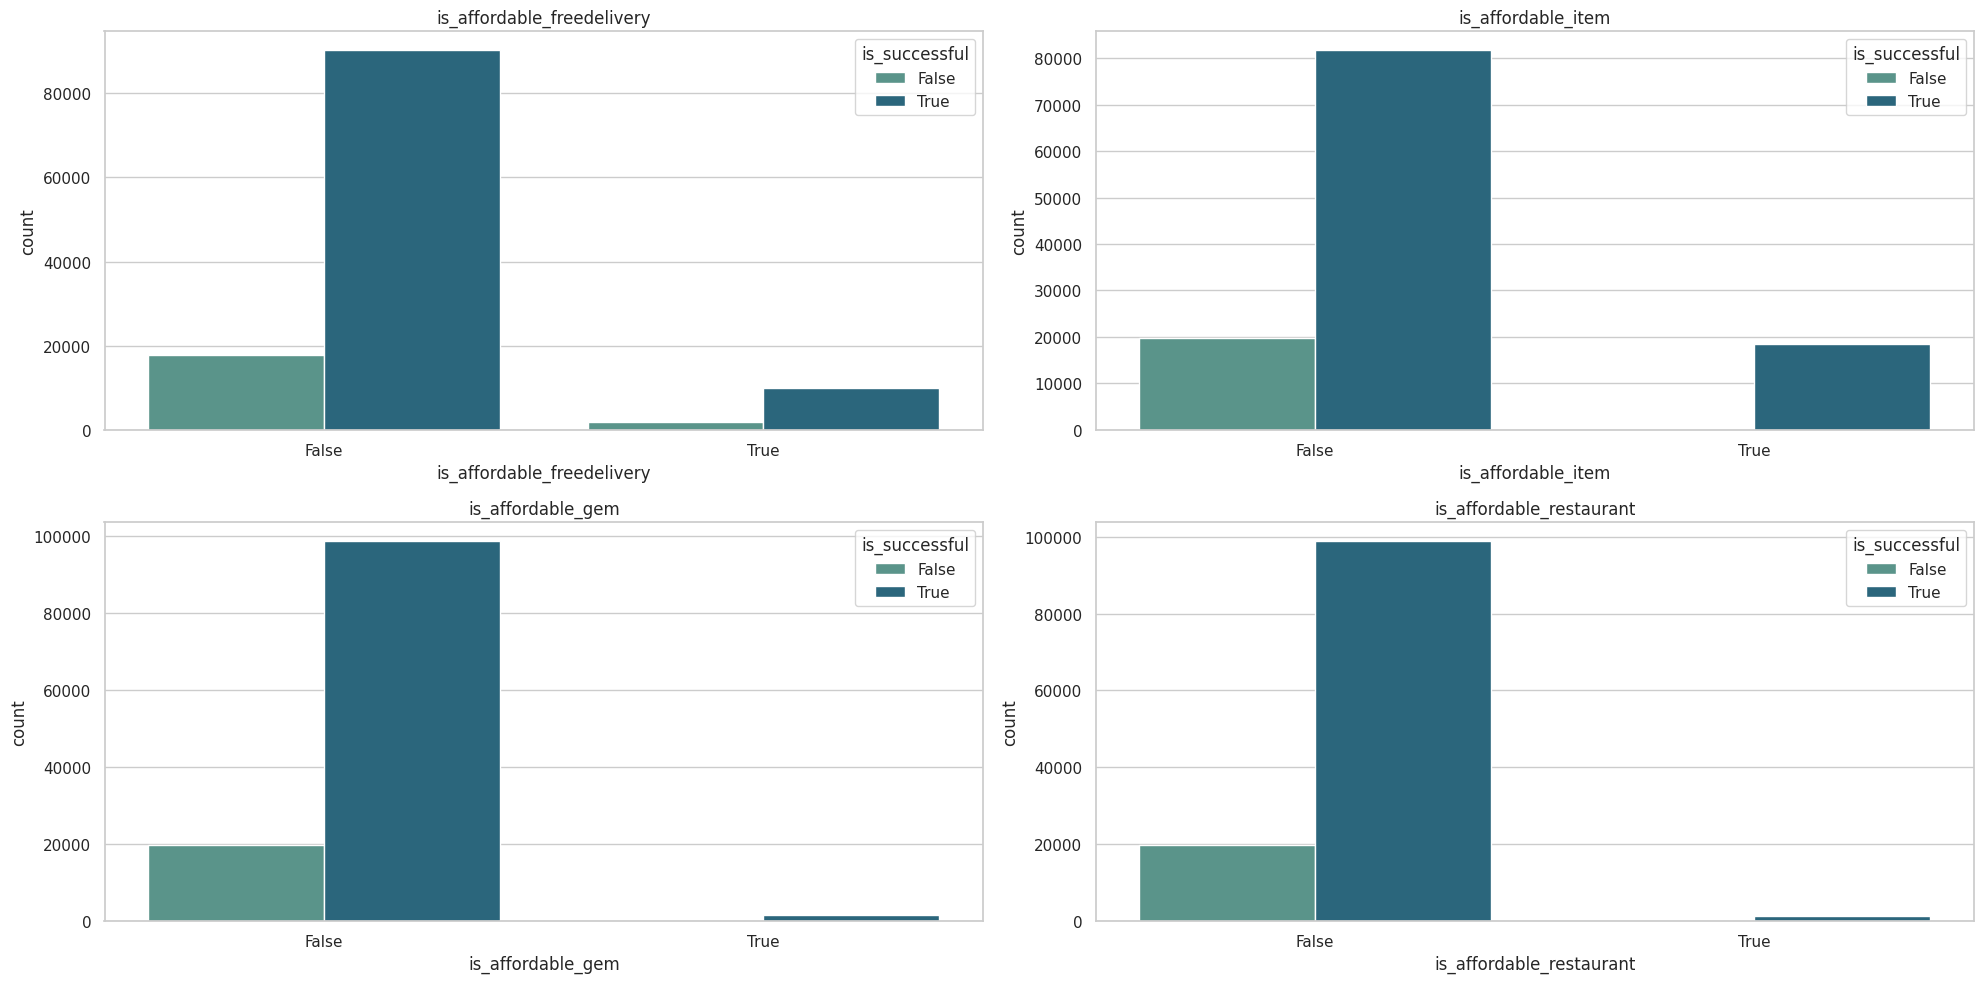

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

plt.subplot(221)
sns.countplot(x="is_affordable_freedelivery", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_freedelivery')

plt.subplot(222)
sns.countplot(x="is_affordable_item", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_item')

plt.subplot(223)
sns.countplot(x="is_affordable_gem", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_gem')

plt.subplot(224)
sns.countplot(x="is_affordable_restaurant", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_restaurant')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
city_coordinates = {
    'Ahmedabad': {'lat': 23.0225, 'lon': 72.5714},
    'Bengaluru': {'lat': 12.9716, 'lon': 77.5946},
    'Chennai': {'lat': 13.0827, 'lon': 80.2707},
    'Coimbatore': {'lat': 11.0168, 'lon': 76.9558},
    'Delhi': {'lat': 28.6139, 'lon': 77.209},
    'Gurgaon': {'lat': 28.4595, 'lon': 77.0266},
    'Hyderabad': {'lat': 17.385, 'lon': 78.4867},
    'Jaipur': {'lat': 26.9124, 'lon': 75.7873},
    'Jodhpur': {'lat': 26.2389, 'lon': 73.0243},
    'Kochi': {'lat': 9.9312, 'lon': 76.2673},
    'Kolkata': {'lat': 22.5726, 'lon': 88.3639},
    'Lucknow': {'lat': 26.8467, 'lon': 80.9462},
    'Ludhiana': {'lat': 30.901, 'lon': 75.8573},
    'Madurai': {'lat': 9.9252, 'lon': 78.1198},
    'Manali': {'lat': 32.2396, 'lon': 77.1887},
    'Mumbai': {'lat': 19.076, 'lon': 72.8777},
    'Mysore': {'lat': 12.2958, 'lon': 76.6394},
    'Nagpur': {'lat': 21.1458, 'lon': 79.0882},
    'Ooty': {'lat': 11.4067, 'lon': 76.6932},
    'Pune': {'lat': 18.5204, 'lon': 73.8567},
    'Rourkela': {'lat': 22.2587, 'lon': 84.9011},
    'Trivandrum': {'lat': 8.5241, 'lon': 76.9366},
    'Vadodara': {'lat': 22.3072, 'lon': 73.1812}
}

# Calculate the number of orders per city
orders_per_city = df.groupby('City')['order_id'].count().reset_index()
orders_per_city.columns = ['City', 'Number_of_Orders']

# Add latitude and longitude coordinates to the DataFrame
orders_per_city['lat'] = orders_per_city['City'].apply(lambda x: city_coordinates[x]['lat'])
orders_per_city['lon'] = orders_per_city['City'].apply(lambda x: city_coordinates[x]['lon'])

# Create a scatter map for the number of orders per city in India using Plotly Express
fig = px.scatter_mapbox(orders_per_city, lat="lat", lon="lon", hover_name="City", hover_data=["Number_of_Orders"],
                        size="Number_of_Orders", color="Number_of_Orders", size_max=50,
                        mapbox_style="carto-positron", zoom=4, title='Number of Orders per City in India')
fig.show()

PREPROCESSING

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('/content/food_delivery.csv')

In [6]:
df = df.drop('analytical_customer_id', axis = 1)

In [7]:
df = df.drop('reason', axis = 1)

In [8]:
df = df.drop('sub_reason', axis = 1)

In [9]:
df = df.drop('order_id', axis = 1)

In [10]:
df = df.drop('order_time', axis = 1)

In [11]:
df = df.drop('owner', axis = 1)

In [12]:
df = df.drop('is_acquisition', axis = 1)

In [13]:
df = df.drop('actual_delivery_time', axis = 1)

In [14]:
df = df.drop('order_delay', axis = 1)

In [15]:
# Handle Missing Values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Convert columns to numeric, handling string values with commas
def clean_float_value(val):
    if isinstance(val, str):
        return float(val.replace(',', '.'))
    return val
columns_to_clean = ['dropoff_distance_manhattan', 'delivery_fee_amount_lc', 'gmv_amount_lc', 'basket_amount_lc','affordability_amt_total']
for col in columns_to_clean:
    df[col] = df[col].apply(clean_float_value)

# Drop rows with NaN values in the target column 'is_successful'
df.dropna(inplace=True)

In [ ]:
df.head()

,is_successful,delivery_arrangement,gmv_amount_lc,basket_amount_lc,delivery_fee_amount_lc,Payment Method,promised_delivery_time,dropoff_distance_manhattan,platform,vertical_class,vertical,is_affordable_freedelivery,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City
7,True,TGO,154.99,152.00,2.99,Online - Card,2219.0,338.0,android,food,food,False,True,False,False,False,True,38.00,Chennai
8,True,TGO,134.99,130.00,4.99,Cash,2219.0,911.0,iOS,food,food,False,False,False,False,False,False,38.00,Chennai
9,True,TGO,476.99,472.00,4.99,Cash,2759.0,819.0,android,food,food,False,False,False,False,False,False,38.00,Chennai
10,True,TGO,49.99,40.00,9.99,Cash,1799.0,2144.0,iOS,food,food,False,False,False,False,False,False,38.00,Chennai
11,True,TGO,127.24,107.25,19.99,Cash,2279.0,5866.0,android,food,food,False,True,False,False,False,True,6.75,Chennai


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119878 entries, 7 to 119884
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   is_successful               119878 non-null  bool   
 1   delivery_arrangement        119878 non-null  object 
 2   gmv_amount_lc               119878 non-null  float64
 3   basket_amount_lc            119878 non-null  float64
 4   delivery_fee_amount_lc      119878 non-null  float64
 5   Payment Method              119878 non-null  object 
 6   promised_delivery_time      119878 non-null  float64
 7   dropoff_distance_manhattan  119878 non-null  float64
 8   platform                    119878 non-null  object 
 9   vertical_class              119878 non-null  object 
 10  vertical                    119878 non-null  object 
 11  is_affordable_freedelivery  119878 non-null  bool   
 12  is_affordable_item          119878 non-null  bool   
 13  is_affordable_gem  

In [16]:
# Check unique values in each categorical column before one-hot encoding
categorical_cols_to_encode = ['platform','vertical_class', 'vertical', 'City', 'Payment Method', 'delivery_arrangement']
for col in categorical_cols_to_encode:
    print(f"Unique values in {col}: {df[col].unique()}")

# One-Hot Encoding for categorical columns with string values
for col in categorical_cols_to_encode:
    if df[col].dtype == 'object':
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
        df.drop(col, axis=1, inplace=True)

Unique values in platform: ['android' 'iOS' 'desktop web' 'mobile web']
Unique values in vertical_class: ['food' 'non-food']
Unique values in vertical: ['food' 'grocery' 'pharmacy' 'electronics' 'cosmetics' 'pet shop'
 'flowers']
Unique values in City: ['Chennai' 'Mysore' 'Delhi' 'Vadodara' 'Mumbai' 'Kolkata' 'Coimbatore'
 'Trivandrum' 'Ahmedabad' 'Jaipur' 'Pune' 'Manali' 'Bengaluru' 'Kochi'
 'Hyderabad' 'Lucknow' 'Jodhpur' 'Gurgaon' 'Nagpur' 'Madurai' 'Rourkela'
 'Ooty' 'Ludhiana']
Unique values in Payment Method: ['Online - Card' 'Cash' 'Online - Wallet' 'Online - Pay Later']
Unique values in delivery_arrangement: ['TGO' 'TMP']


In [47]:
# Separate features and target variable
X = df.drop('is_successful', axis=1)
y = df['is_successful']
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
len(X_train.columns)

54

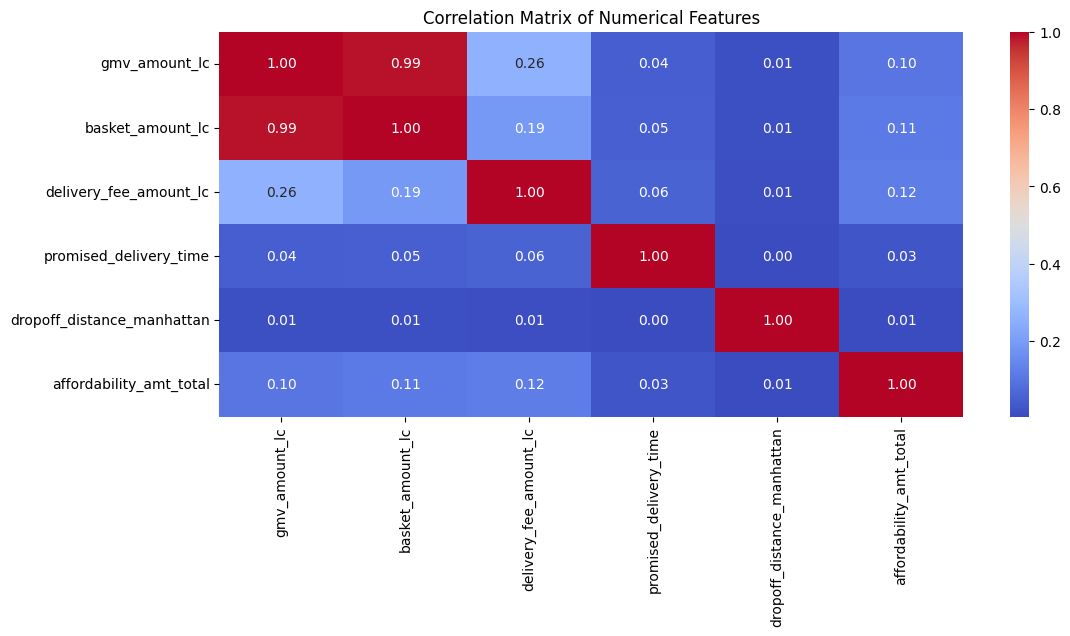

In [18]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##Models

###Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy of Random Forest Classifier without parameters tuning: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy of Random Forest Classifier without parameters tuning: 99.37%
Precision: 0.99
Recall: 1.00
F1 Score: 1.00


In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_

# Evaluate the model with cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Use the best model to predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Best hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Cross-Validation Scores: [0.9922319  0.99290965 0.99436913 0.99296142 0.99316997]
Mean CV Accuracy: 99.31%
Accuracy: 99.35%
Precision: 0.99
Recall: 1.00
F1 Score: 1.00


In [ ]:
# Instantiate the Random Forest Classifier model with the best hyperparameters and balanced class weight
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model with cross-validation on the training data
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Predict on the test set using the fitted model
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred_proba)
# Print the evaluation metrics on the test set
print("Accuracy for the best hypermapameters after balancing the classes: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("AUROC: {:.2f}".format(auroc))

Cross-Validation Scores: [0.99092852 0.99202336 0.99270073 0.9919708  0.99212722]
Mean CV Accuracy: 99.20%
Accuracy for the best hypermapameters after balancing the classes: 99.23%
Precision: 0.99
Recall: 1.00
F1 Score: 1.00
AUROC: 1.00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate the AUROC
auroc = roc_auc_score(y_test, y_pred_proba)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
# Calculate the F1 score for each possible threshold
f1_scores = 2*recall*precision / (recall+precision)
# Find the index of the maximum F1 score
best_threshold_index = np.argmax(f1_scores)
# Get the threshold that maximizes the F1 score
best_threshold = thresholds[best_threshold_index]
print("Best Threshold for F1 score:", best_threshold)

y_pred_thresholded = (y_pred_proba >= best_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_thresholded)
precision = precision_score(y_test, y_pred_thresholded)
recall = recall_score(y_test, y_pred_thresholded)
f1 = f1_score(y_test, y_pred_thresholded)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("AUROC with regularization: {:.2f}".format(auroc))

Best Threshold for F1 score: 0.3062469684297069
Accuracy: 97.08%
Precision: 0.98
Recall: 0.99
F1 Score: 0.98
AUROC with regularization: 0.99


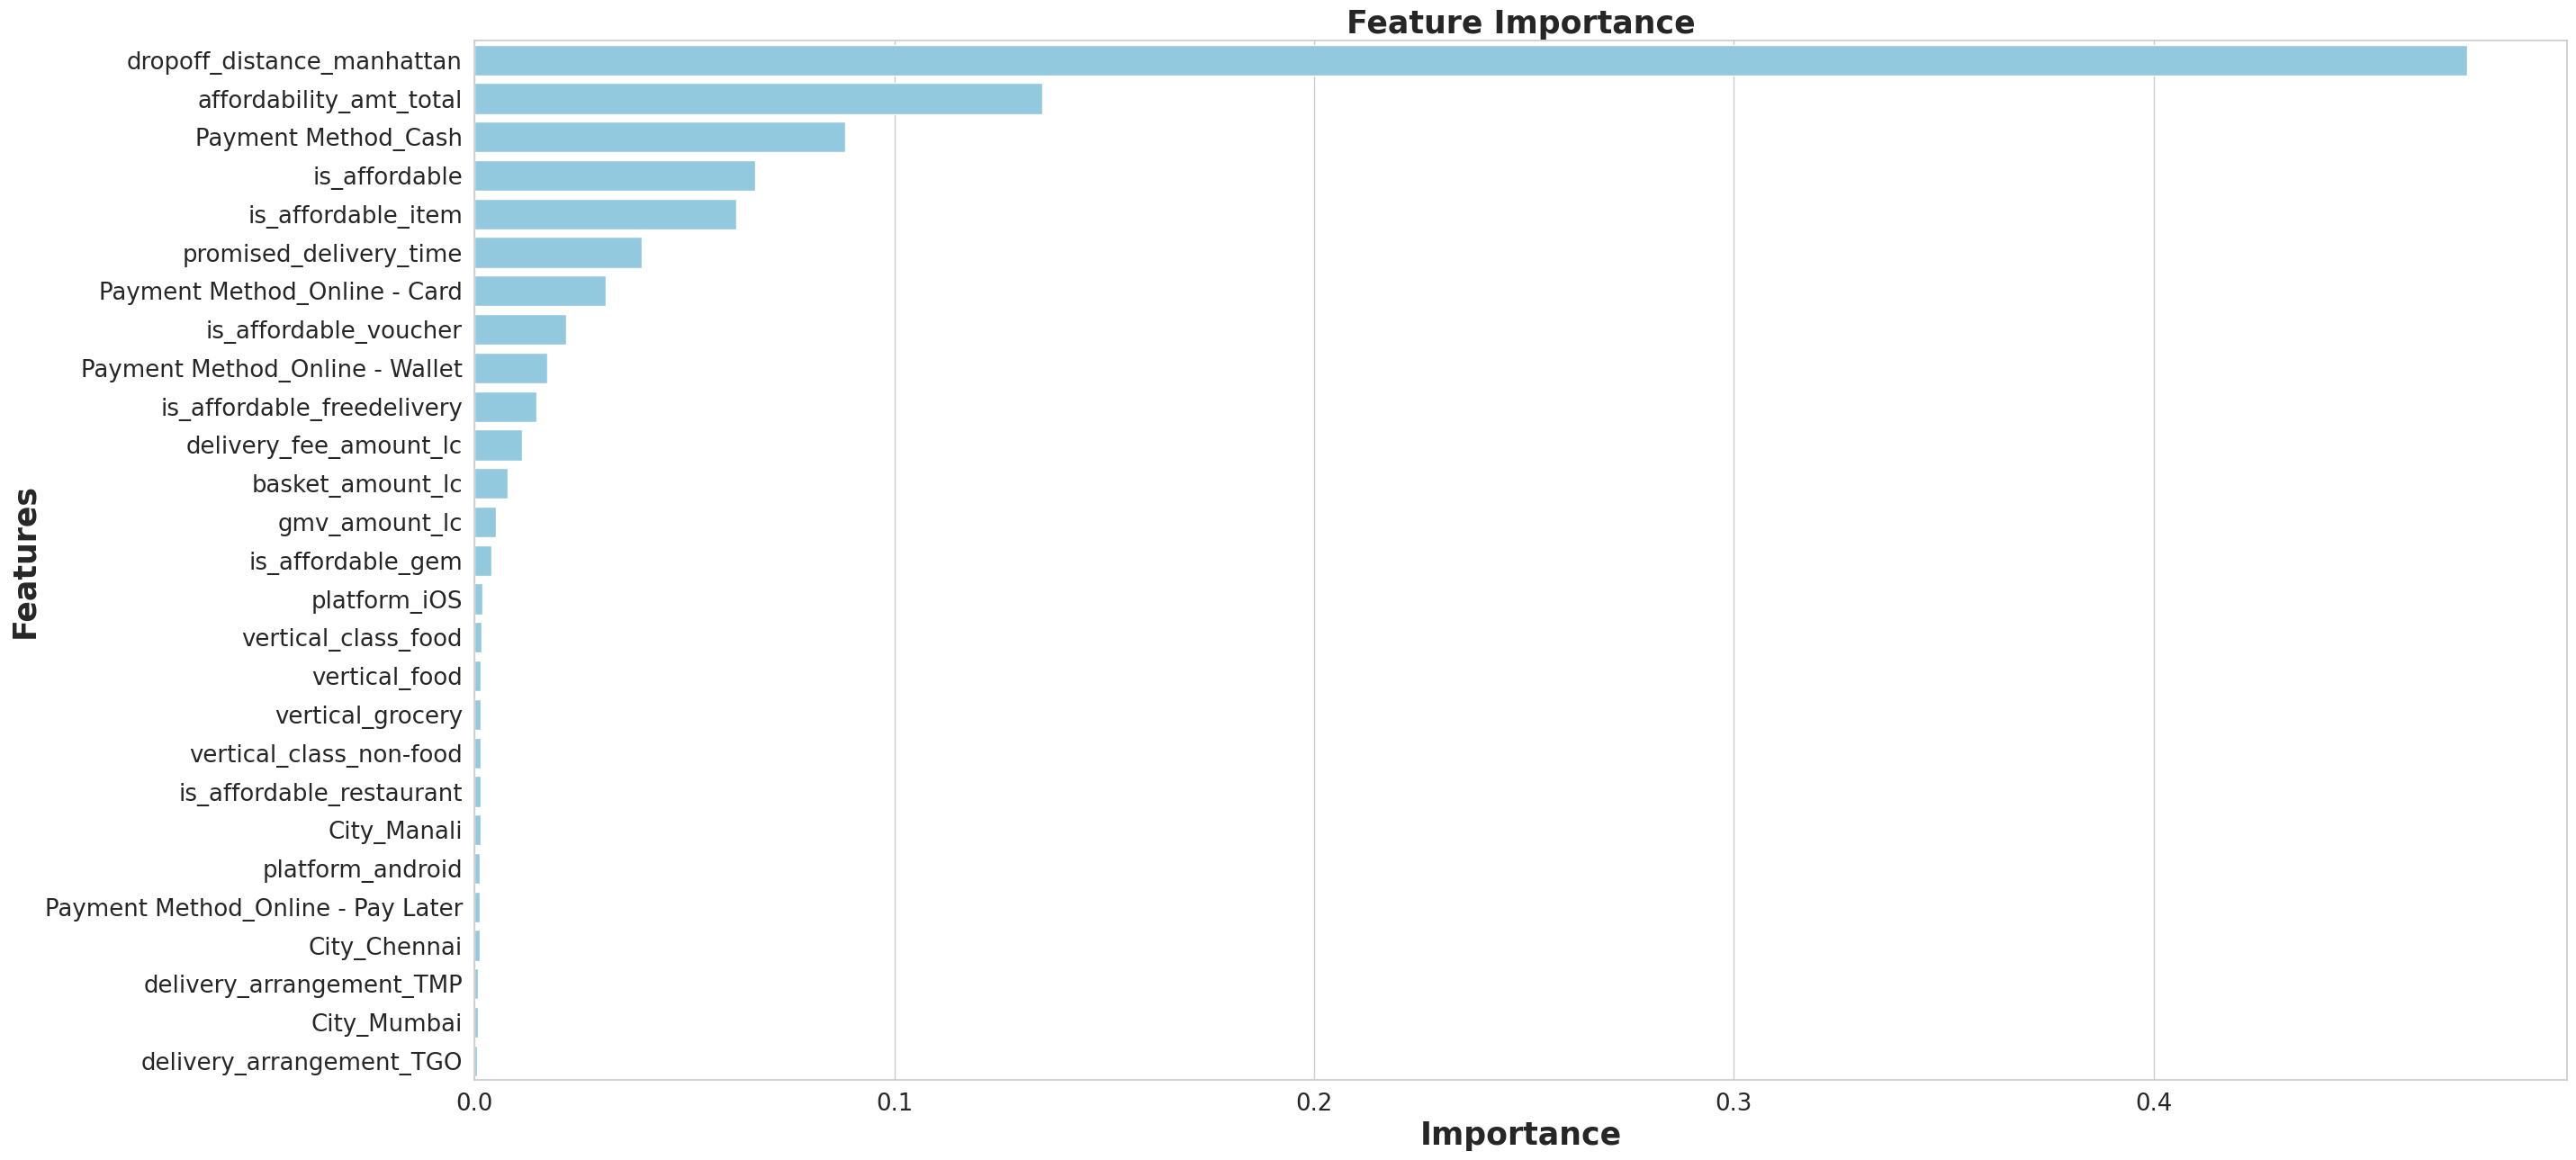

In [ ]:
feats = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    if importance > 0.0005:  # Filter features with non-zero importance
        feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(style="whitegrid", font_scale=1.7)
fig, ax = plt.subplots(figsize=(30, 15))

sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight='bold')
plt.ylabel('Features', fontsize=25, weight='bold')
plt.title('Feature Importance', fontsize=25, weight='bold')

plt.show()

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy of Logistic Regression: {:.2f}%".format(accuracy * 100))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("AUROC: {:.2f}".format(auroc))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy of Logistic Regression: 85.87%
Precision: 0.87
Recall: 0.98
F1 Score: 0.92
AUROC: 0.84


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Create a pipeline and fit the model
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, class_weight='balanced'))
lr_pipeline.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = lr_pipeline.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate the F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
# Find the index of the maximum F1 score
optimal_index = np.argmax(f1_scores)
best_threshold = thresholds[optimal_index]

# Use this threshold for final prediction
y_pred = (y_pred_proba >= best_threshold).astype(int)

# Calculate and print the final metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # AUROC score

print("Logistic Regression after hyperparameters tuning, balancing the classes and implementing StandardScaler:")
print("Best Threshold: {:.2f}".format(best_threshold))
print("Accuracy of Logistic Regression: {:.2f}%".format(accuracy * 100))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUROC: {roc_auc:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression after hyperparameters tuning, balancing the classes and implementing StandardScaler:
Best Threshold: 0.12
Accuracy of Logistic Regression: 86.79%
Precision: 0.88
Recall: 0.98
F1 Score: 0.93
AUROC: 0.89


###GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # AUROC score

print("Accuracy of GradientBoostingClassifier: {:.2f}%".format(accuracy * 100))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUROC: {roc_auc:.2f}")

Accuracy of GradientBoostingClassifier: 99.22%
Precision: 0.99
Recall: 1.00
F1 Score: 1.00
AUROC: 0.99


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

gb_model = GradientBoostingClassifier(
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,
    tol=0.01
)

# Fit the model
gb_model.fit(X_train, y_train)

# Predict probabilities and use them for the AUROC score
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Predict class labels for the test set
y_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy of GradientBoostingClassifier: {:.2f}%".format(accuracy * 100))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUROC: {roc_auc:.2f}")

Accuracy of GradientBoostingClassifier: 98.99%
Precision: 0.99
Recall: 1.00
F1 Score: 0.99
AUROC: 0.99


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Perform the train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Fit the Gradient Boosting model on the resampled training data
gb_model_smote = GradientBoostingClassifier(random_state=42)
gb_model_smote.fit(X_train_smote, y_train_smote)

# Predict class labels and probabilities on the original non-resampled test set
y_pred = gb_model_smote.predict(X_test)
y_pred_proba = gb_model_smote.predict_proba(X_test)[:, 1]

# Recalculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy of GradientBoostingClassifier after SMOTE: {:.2f}%".format(accuracy * 100))
print(f"Precision after SMOTE: {precision:.2f}")
print(f"Recall after SMOTE: {recall:.2f}")
print(f"F1 Score after SMOTE: {f1:.2f}")
print(f"AUROC after SMOTE: {roc_auc:.2f}")

Accuracy of GradientBoostingClassifier after SMOTE: 97.43%
Precision after SMOTE: 0.99
Recall after SMOTE: 0.98
F1 Score after SMOTE: 0.98
AUROC after SMOTE: 0.99


###Naive Bayes

In [19]:
df_nb = df.drop('basket_amount_lc', axis = 1)

In [20]:
df_nb.head()

,is_successful,gmv_amount_lc,delivery_fee_amount_lc,promised_delivery_time,dropoff_distance_manhattan,is_affordable_freedelivery,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,...,City_Pune,City_Rourkela,City_Trivandrum,City_Vadodara,Payment Method_Cash,Payment Method_Online - Card,Payment Method_Online - Pay Later,Payment Method_Online - Wallet,delivery_arrangement_TGO,delivery_arrangement_TMP
7,True,154.99,2.99,2219.0,338.0,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
8,True,134.99,4.99,2219.0,911.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
9,True,476.99,4.99,2759.0,819.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
10,True,49.99,9.99,1799.0,2144.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
11,True,127.24,19.99,2279.0,5866.0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [21]:
X_nb = df_nb.drop('is_successful', axis=1)
y_nb = df_nb['is_successful']
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, shuffle=True, random_state=42)

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

y_pred_nb = nb_model.predict(X_test_nb)
y_pred_proba = nb_model.predict_proba(X_test_nb)[:, 1]
accuracy = accuracy_score(y_test_nb, y_pred_nb)
precision = precision_score(y_test_nb, y_pred_nb)
recall = recall_score(y_test_nb, y_pred_nb)
f1 = f1_score(y_test_nb, y_pred_nb)
roc_auc = roc_auc_score(y_test_nb, y_pred_proba)  # AUROC score

print("Accuracy of Naive Bayes: {:.2f}%".format(accuracy * 100))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUROC: {roc_auc:.2f}")

Accuracy of Naive Bayes: 38.04%
Precision: 0.97
Recall: 0.27
F1 Score: 0.42
AUROC: 0.68


In [24]:
df_bn = df.drop('gmv_amount_lc', axis = 1)

In [25]:
X_bn = df_bn.drop('is_successful', axis=1)
y_bn = df_bn['is_successful']
X_train_bn, X_test_bn, y_train_bn, y_test_bn = train_test_split(X_bn, y_bn, test_size=0.2, shuffle=True, random_state=42)

In [26]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_bn, y_train_bn)

y_pred_bn = nb_model.predict(X_test_bn)
y_pred_proba = nb_model.predict_proba(X_test_bn)[:, 1]
accuracy = accuracy_score(y_test_bn, y_pred_bn)
precision = precision_score(y_test_bn, y_pred_bn)
recall = recall_score(y_test_bn, y_pred_bn)
f1 = f1_score(y_test_bn, y_pred_bn)
roc_auc = roc_auc_score(y_test_bn, y_pred_proba)  # AUROC score

print("Accuracy of Naive Bayes: {:.2f}%".format(accuracy * 100))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUROC: {roc_auc:.2f}")

Accuracy of Naive Bayes: 37.99%
Precision: 0.97
Recall: 0.27
F1 Score: 0.42
AUROC: 0.68


In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create a pipeline for scaling and GaussianNB
nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('gnb', GaussianNB())
])

# If the dataset is imbalanced, perform resampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_nb, y_train_nb)

# Fit the Gaussian Naive Bayes model on the scaled and resampled training data through the pipeline
nb_pipeline.fit(X_train_smote, y_train_smote)

# Predict class labels for the test set
y_pred_nb = nb_pipeline.predict(X_test_nb)

# Probabilities for AUROC
y_pred_proba = nb_pipeline.predict_proba(X_test_nb)[:, 1]

# Evaluate the classifier
accuracy = accuracy_score(y_test_nb, y_pred_nb)
precision = precision_score(y_test_nb, y_pred_nb)
recall = recall_score(y_test_nb, y_pred_nb)
f1 = f1_score(y_test_nb, y_pred_nb)
roc_auc = roc_auc_score(y_test_nb, y_pred_proba)

print("Accuracy of Naive Bayes: {:.2f}%".format(accuracy * 100))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUROC: {roc_auc:.2f}")

# Additional Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(nb_pipeline, X_train_nb, y_train_nb, cv=skf, scoring='f1')
print(f"Mean F1 Score via Cross-Validation: {cv_scores.mean():.2f}")

Accuracy of Naive Bayes: 35.34%
Precision: 1.00
Recall: 0.23
F1 Score: 0.37
AUROC: 0.75
Mean F1 Score via Cross-Validation: 0.38


###SVC

In [29]:
from sklearn.svm import SVC

# Instantiate SVC with the probability argument set to True
svm_model = SVC(random_state=42, probability=False)

# Train the model
svm_model.fit(X_train, y_train)
# Predict on the test set
y_pred = svm_model.predict(X_test)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# auroc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
# print("AUROC: {:.2f}".format(auroc))

Accuracy: 83.60%
Precision: 0.84
Recall: 1.00
F1 Score: 0.91


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Correct class name here
    ('svm', SVC(kernel='linear', random_state=42, tol=1e-3))
])

# Calibrate probabilities on a hold-out set
calibrated_svc = CalibratedClassifierCV(svm_pipeline, method='sigmoid', cv=3)

# Fit the model - this will be faster than fitting a non-linear kernel with probability=True
calibrated_svc.fit(X_train, y_train)

# Predict on the test set
y_pred = calibrated_svc.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy of Calibrated SVC: {:.2f}%".format(accuracy * 100))
print("Precision of Calibrated SVC: {:.2f}".format(precision))
print("Recall of Calibrated SVC: {:.2f}".format(recall))
print("F1 Score of Calibrated SVC: {:.2f}".format(f1))

Accuracy of Calibrated SVC: 86.11%
Precision of Calibrated SVC: 0.87
Recall of Calibrated SVC: 0.99
F1 Score of Calibrated SVC: 0.92


###Neural Network

In [33]:
pip install tensorflow

In [35]:
X_train_n = X_train.values.astype('float32')
X_test_n = X_test.values.astype('float32')

In [37]:
y_train_n = y_train.values.astype('float32')
y_test_n = y_test.values.astype('float32')

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
# Define the neural network structure
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history = model.fit(
    X_train_n,
    y_train_n,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_n, y_test_n),
    class_weight={0: 1, 1: (len(y_train_n) - np.sum(y_train_n)) / np.sum(y_train_n)},  # Adjust weights for imbalance
    verbose=1
)

# Predict classes on the test set
y_pred = (model.predict(X_test_n) > 0.5).astype('int32')

accuracy_nn = accuracy_score(y_test_n, y_pred)
precision_nn = precision_score(y_test_n, y_pred)
recall_nn = recall_score(y_test_n, y_pred)
f1_nn = f1_score(y_test_n, y_pred)
auroc_nn = roc_auc_score(y_test_n, y_pred)

print("Neural Network Performance Metrics:")
print("Accuracy: {:.2f}%".format(accuracy_nn * 100))
print("Precision: {:.2f}".format(precision_nn))
print("Recall: {:.2f}".format(recall_nn))
print("F1 Score: {:.2f}".format(f1_nn))
print("AUROC: {:.2f}".format(auroc_nn))

Epoch 1/100
1499/1499 [==============================] - 14s 8ms/step - loss: 3.4751 - accuracy: 0.7034 - val_loss: 8.0907 - val_accuracy: 0.9276
Epoch 2/100
1499/1499 [==============================] - 9s 6ms/step - loss: 0.2223 - accuracy: 0.8510 - val_loss: 1.0369 - val_accuracy: 0.9286
Epoch 3/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.1656 - accuracy: 0.9082 - val_loss: 1.5777 - val_accuracy: 0.9293
Epoch 4/100
1499/1499 [==============================] - 5s 4ms/step - loss: 0.1661 - accuracy: 0.9153 - val_loss: 0.9607 - val_accuracy: 0.9301
Epoch 5/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.1611 - accuracy: 0.9141 - val_loss: 1.5344 - val_accuracy: 0.9306
Epoch 6/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.1620 - accuracy: 0.9049 - val_loss: 1.1063 - val_accuracy: 0.9328
Epoch 7/100
1499/1499 [==============================] - 6s 4ms/step - loss: 0.1557 - accuracy: 0.9132 - val_loss: 1.1415 - val_a

###EasyEnsembleClassifier

In [40]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [43]:
from imblearn.ensemble import EasyEnsembleClassifier
# Initialize EasyEnsembleClassifier
ee_classifier = EasyEnsembleClassifier(n_estimators=5, random_state=42)

# Fit the model to the training data
ee_classifier.fit(X_train, y_train)

y_pred = ee_classifier.predict(X_test)
y_pred_proba = ee_classifier.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("AUROC: {:.2f}".format(roc_auc))

Accuracy: 94.71%
Precision: 0.99
Recall: 0.94
F1 Score: 0.97
AUROC: 0.99


###NearMiss method

In [52]:
from imblearn.under_sampling import NearMiss

# Initialize NearMiss
nearmiss = NearMiss(version=3)

# Resample the training data
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)

# Now we have a balanced training dataset we can train our classifier on
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_nm, y_train_nm)

# Predict on the test set
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Accuracy of NearMiss for RF: {:.2f}%".format(accuracy * 100))
print("Precision of NearMiss for RF: {:.2f}".format(precision))
print("Recall of NearMiss for RF: {:.2f}".format(recall))
print("F1 Score of NearMiss for RF: {:.2f}".format(f1))
print("AUROC of NearMiss for RF: {:.2f}".format(roc_auc))

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


Accuracy of NearMiss for RF: 86.46%
Precision of NearMiss for RF: 1.00
Recall of NearMiss for RF: 0.84
F1 Score of NearMiss for RF: 0.91
AUROC of NearMiss for RF: 0.99


In [55]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_nm, y_train_nm)

# Predict on the test set
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]  # Logistic Regression supports predict_proba

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # AUROC score

# Print the evaluation metrics
print("Accuracy of NearMiss for LR: {:.2f}%".format(accuracy * 100))
print("Precision of NearMiss for LR : {:.2f}".format(precision))
print("Recall of NearMiss for LR: {:.2f}".format(recall))
print("F1 Score of NearMiss for LR: {:.2f}".format(f1))
print("AUROC of NearMiss for LR: {:.2f}".format(roc_auc))

Accuracy of NearMiss for LR: 33.01%
Precision of NearMiss for LR : 1.00
Recall of NearMiss for LR: 0.20
F1 Score of NearMiss for LR: 0.33
AUROC of NearMiss for LR: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "Only 'saga' solver supports elasticnet penalty, got solver={}.".format(


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Resample the training data
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)

# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on the resampled training data
gb_classifier.fit(X_train_nm, y_train_nm)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)
y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Accuracy of NearMiss with Gradient Boosting: {:.2f}%".format(accuracy * 100))
print("Precision of NearMiss with Gradient Boosting: {:.2f}".format(precision))
print("Recall of NearMiss with Gradient Boosting: {:.2f}".format(recall))
print("F1 Score of NearMiss with Gradient Boosting: {:.2f}".format(f1))
print("AUROC of NearMiss with Gradient Boosting: {:.2f}".format(roc_auc))

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


Accuracy of NearMiss with Gradient Boosting: 86.53%
Precision of NearMiss with Gradient Boosting: 1.00
Recall of NearMiss with Gradient Boosting: 0.84
F1 Score of NearMiss with Gradient Boosting: 0.91
AUROC of NearMiss with Gradient Boosting: 0.99
